In [104]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta


def week_dataframe():
    db = DbConn()
    
    select_query = """
    select dailydate2 ,  max(to_char(dailydate2, 'dy')), sum(audicnt)
    from boxoffice  
    where  dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('14/01/01', 'YY/mm/dd')
    group by dailydate2
    order by dailydate2
    """
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


print(week_dataframe())

# print(max_dataframe())


첫주 작업 완료. -----
[(datetime.datetime(2014, 1, 3, 0, 0), 'fri', 9647), (datetime.datetime(2014, 1, 9, 0, 0), 'thu', 178842), (datetime.datetime(2014, 1, 10, 0, 0), 'fri', 166371), (datetime.datetime(2014, 1, 11, 0, 0), 'sat', 396086), (datetime.datetime(2014, 1, 12, 0, 0), 'sun', 384572), (datetime.datetime(2014, 1, 13, 0, 0), 'mon', 115865), (datetime.datetime(2014, 1, 14, 0, 0), 'tue', 120424), (datetime.datetime(2014, 1, 15, 0, 0), 'wed', 119027), (datetime.datetime(2014, 1, 16, 0, 0), 'thu', 273948), (datetime.datetime(2014, 1, 17, 0, 0), 'fri', 297121), (datetime.datetime(2014, 1, 18, 0, 0), 'sat', 707331), (datetime.datetime(2014, 1, 19, 0, 0), 'sun', 682410), (datetime.datetime(2014, 1, 20, 0, 0), 'mon', 224503), (datetime.datetime(2014, 1, 21, 0, 0), 'tue', 254396), (datetime.datetime(2014, 1, 22, 0, 0), 'wed', 574057), (datetime.datetime(2014, 1, 23, 0, 0), 'thu', 552994), (datetime.datetime(2014, 1, 24, 0, 0), 'fri', 638657), (datetime.datetime(2014, 1, 25, 0, 0), 'sat', 133292

In [105]:
import pandas as pd

df_week_column_name = ['dailydate2', 'whatday','sum_people']
df_week = pd.DataFrame(week_dataframe(), columns=df_week_column_name) 
df_week.tail()


첫주 작업 완료. -----


,dailydate2,whatday,sum_people
1814,2018-12-27,thu,455047
1815,2018-12-28,fri,550943
1816,2018-12-29,sat,1050699
1817,2018-12-30,sun,1070886
1818,2018-12-31,mon,856700


In [106]:
df_week.groupby('whatday')['whatday'].count()

whatday
fri    261
mon    260
sat    260
sun    260
thu    260
tue    259
wed    259
Name: whatday, dtype: int64

In [107]:
mon = df_week[df_week['whatday'] == 'mon']['sum_people']
tue = df_week[df_week['whatday'] == 'tue']['sum_people']
wed = df_week[df_week['whatday'] == 'wed']['sum_people']
thu = df_week[df_week['whatday'] == 'thu']['sum_people']
fri = df_week[df_week['whatday'] == 'fri']['sum_people']
sat = df_week[df_week['whatday'] == 'sat']['sum_people']
sun = df_week[df_week['whatday'] == 'sun']['sum_people']


    
# mon = df_week[df_week['whatday'] == 'mon']['sum_people']


In [108]:
mon.head()
tue.head()
wed.head()
thu.head()
fri.head()
sat.head()
sun.head()


4      384572
11     682410
18    1289755
25    1515184
32    1218494
Name: sum_people, dtype: int64

In [109]:
data = [mon.values,tue.values,wed.values,thu.values,fri.values,sat.values,sun.values]
data

[array([ 115865,  224503,  541873,  591463,  336450,  338904,  313341,
         189491,  182637,  161899,  172744,  203462,  140478,  147639,
         115693,  184234, 1369270,  189195,  205381,  258698,  240954,
         250883,  196299,  199923,  302812,  296187,  309386,  253010,
         534089, 1339237,  902407,  645175,  358314,  260744, 1397668,
         227494,  191241,  167443,  212113,  213639,  176354,  170559,
         144432,  283174,  277922,  289844,  251472,  221358,  277879,
         461842,  674743,  480270,  332415,  371326,  328928,  215065,
         180068,  335832,  340612,  202285,  180100,  191515,  160572,
         203242,  223122,  175843,  147712,  338430,  880216,  164308,
         250126, 1005856,  220656,  174018,  232428,  336118,  408740,
         341461,  361042,  328046,  659381, 1147723,  841237,  627872,
         405863,  333941,  258892,  171953,  281514, 1798330,  223967,
         277440,  196902,  212337,  180288,  266454,  237036,  349906,
      

In [114]:
mon.describe()

count    2.600000e+02
mean     3.711338e+05
std      3.208094e+05
min      8.702200e+04
25%      1.973310e+05
50%      2.558400e+05
75%      3.638128e+05
max      2.000323e+06
Name: sum_people, dtype: float64

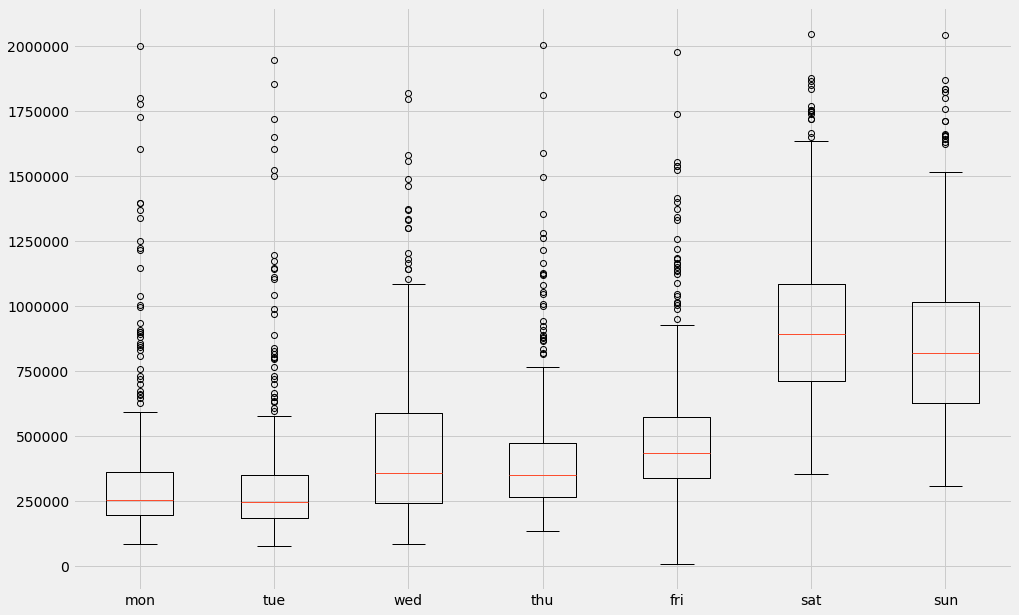

In [115]:
plt.style.use('fivethirtyeight')
fig1, ax = plt.subplots(nrows=1,ncols=1, figsize=(15, 10))
ax.boxplot(data)
ax.set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', ])
plt.show()

In [ ]:
# 토요일, 일요일, 금요일 순으로 영화를 많이보고, 수요일에 변동폭이 크다.